In [1]:
!pip install anthropic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [anthropic]━━━━━━━━ 2/3 [anthropic]


In [1]:
import anthropic

client = anthropic.Anthropic(api_key="your-api-key-here")

message = client.messages.create(
    model="claude-opus-4-6",
    max_tokens=1024,
    messages=[
        {"role": "user", "content": "Hello, are you working?"}
    ]
)

print(message.content[0].text)

Hello! Yes, I'm working and ready to help. How are you doing? Is there something I can assist you with today?


In [2]:
def luxury_advisor(vibe, budget, occasion):
    prompt = f"""You are an expert luxury fashion advisor with deep knowledge of high-end brands across all price points.
    
A client is looking for luxury recommendations with the following:
- Aesthetic/Vibe: {vibe}
- Budget: {budget} (this is a strict limit, do not recommend anything above this budget)
- Occasion: {occasion}

Give them:
1. 3 brand recommendations that match their vibe (with a one sentence explanation of why each fits)
2. 2 specific product suggestions with approximate price and where to find it
3. One styling tip

Be specific, knowledgeable, and speak like a high-end personal stylist."""

    message = client.messages.create(
        model="claude-haiku-4-5-20251001",
        max_tokens=1024,
        messages=[
            {"role": "user", "content": prompt}
        ]
    )
    
    return message.content[0].text

# Try it
result = luxury_advisor(
    vibe="quiet luxury, minimalist, Scandinavian",
    budget="€500-1000",
    occasion="Paris dinner, winter"
)

print(result)

# Your Paris Winter Dinner Edit

## Brand Recommendations

**1. Cos**
Architectural simplicity meets European sophistication—their minimalist tailoring embodies quiet luxury without the logo-heavy approach.

**2. Filippa K**
Swedish design DNA runs through every piece; their neutral palettes and impeccable construction are the gold standard for Scandinavian restraint.

**3. Armedangels**
Sustainable luxury that whispers rather than shouts—their considered pieces in charcoal, cream, and black are perfect for understated elegance.

---

## Specific Pieces

**Filippa K Black Wool Turtleneck**
*€180-220 | filippa-k.com or SSENSE*
The foundation of every sophisticated winter wardrobe. The fit is architectural without being severe—pair with tailored trousers for dinner.

**Cos Oversized Camel Coat**
*€320-380 | cosstores.com or Browns Fashion*
A modern take on the Scandinavian staple. The relaxed silhouette reads as effortlessly expensive, and camel travels beautifully from airport to restau

In [4]:
print("=== LUXURY ADVISOR ===\n")
vibe = input("Describe your aesthetic/vibe: ")
budget = input("Budget: ")
occasion = input("Occasion: ")

print("\nGenerating your edit...\n")
result = luxury_advisor(vibe, budget, occasion)
print(result)

=== LUXURY ADVISOR ===



Describe your aesthetic/vibe:  Opium emo streetwear, dark
Budget:  500
Occasion:  Club night out



Generating your edit...

# Your Opium Emo Streetwear Club Night Edit

## Brand Recommendations

**Rick Owens**
The architect of deconstructed luxury—his silhouettes embody that moody, avant-garde rebellion you're after with impeccable tailoring that reads expensive even in all black.

**Yohji Yamamoto**
Master of architectural darkness and dramatic draping; his pieces have an intellectual edge that elevates emo aesthetics from costume into high-fashion statement.

**Undercover**
Jun Takahashi's brand fuses punk ethos with Japanese precision, delivering pieces that feel genuinely subversive rather than trying-too-hard.

## Specific Product Suggestions

**Rick Owens "Creatch" Cargo Pants** — ~$450-480
Available at SSENSE, Dover Street Market, Rick Owens' official site
The definition of club-ready edge: dropped crotch, exaggerated proportions, that signature Rick silhouette that photographs beautifully under strobe lighting.

**Yohji Yamamoto Y's Black Oversized Wool Blazer** — ~$380-420

In [5]:
!pip install fpdf2

In [7]:
from fpdf import FPDF

def save_to_pdf(vibe, budget, occasion, result):
    pdf = FPDF()
    pdf.add_page()
    
    # Title
    pdf.set_font("Helvetica", "B", 20)
    pdf.cell(0, 15, "LUXURY ADVISOR", ln=True, align="C")
    
    # Inputs
    pdf.set_font("Helvetica", "B", 12)
    pdf.ln(5)
    pdf.cell(0, 10, f"Vibe: {vibe}", ln=True)
    pdf.cell(0, 10, f"Budget: {budget}", ln=True)
    pdf.cell(0, 10, f"Occasion: {occasion}", ln=True)
    
    # Divider
    pdf.ln(5)
    pdf.line(10, pdf.get_y(), 200, pdf.get_y())
    pdf.ln(5)
    
    # Clean the result text and write it
    pdf.set_font("Helvetica", "", 11)
    clean = result.replace("**", "").replace("##", "").replace("*", "").replace("\u2013", "-").replace("\u2014", "-").replace("\u2018", "'").replace("\u2019", "'").replace("\u201c", '"').replace("\u201d", '"')
    pdf.multi_cell(0, 8, clean)
    
    filename = "luxury_recommendations.pdf"
    pdf.output(filename)
    print(f"Saved as {filename}")

# Run everything together
print("=== LUXURY ADVISOR ===\n")
vibe = input("Describe your aesthetic/vibe: ")
budget = input("Budget: ")
occasion = input("Occasion: ")

print("\nGenerating your edit...\n")
result = luxury_advisor(vibe, budget, occasion)
print(result)

save_to_pdf(vibe, budget, occasion, result)

=== LUXURY ADVISOR ===



Describe your aesthetic/vibe:  brutalist, dark
Budget:  2000
Occasion:  wedding



Generating your edit...

# Your Brutalist Wedding Aesthetic

## Brand Recommendations

1. **Rick Owens** — The quintessential architect of dark luxury; his deconstructed silhouettes and obsidian color palette define contemporary brutalism in high fashion.

2. **Ann Demeulemeester** — Belgian minimalism meets raw elegance; her structured tailoring and monochromatic approach create an austere, gallery-like sophistication.

3. **Lemaire** — Understated architectural precision with impeccable construction; their neutral palette and geometric proportions deliver brutalism without the drama.

## Specific Product Suggestions

**Rick Owens Drkshdw High Neck Long Sleeve ($680)**
*Available at: SSENSE, Dover Street Market*
Pair with tailored trousers for an avant-garde ceremony look. The elongated silhouette reads as contemporary and intentional.

**Ann Demeulemeester Wool Tailored Blazer in Black ($1,200)**
*Available at: Matchesfashion, Browns Fashion*
A dark, sharp-shouldered piece that anch

/var/folders/15/5xjzw7z9491fjf4l85mqzbpw0000gn/T/ipykernel_30179/3209632301.py:9: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 15, "LUXURY ADVISOR", ln=True, align="C")
/var/folders/15/5xjzw7z9491fjf4l85mqzbpw0000gn/T/ipykernel_30179/3209632301.py:14: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, f"Vibe: {vibe}", ln=True)
/var/folders/15/5xjzw7z9491fjf4l85mqzbpw0000gn/T/ipykernel_30179/3209632301.py:15: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, f"Budget: {budget}", ln=True)
/var/folders/15/5xjzw7z9491fjf4l85mqzbpw0000gn/T/ipykernel_30179/3209632301.py:16: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0,

In [13]:
import csv
import os
from datetime import datetime

def save_to_csv(vibe, budget, occasion, result):
    filename = "luxury_search_history.csv"
    file_exists = os.path.exists(filename)
    
    with open(filename, "a", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        if not file_exists:
            writer.writerow(["Date", "Vibe", "Budget", "Occasion", "Result"])
        writer.writerow([datetime.now().strftime("%Y-%m-%d %H:%M"), vibe, budget, occasion, result])
    
    print(f"Logged to {filename}")

# Run everything together
print("=== LUXURY ADVISOR ===\n")
vibe = input("Describe your aesthetic/vibe: ")
budget = input("Budget: ")
occasion = input("Occasion: ")

print("\nGenerating your edit...\n")
result = luxury_advisor(vibe, budget, occasion)
print(result)

save_to_pdf(vibe, budget, occasion, result)
save_to_csv(vibe, budget, occasion, result)

=== LUXURY ADVISOR ===



Describe your aesthetic/vibe:  avant-garde
Budget:  2500
Occasion:  nightclub



Generating your edit...

# Your Avant-Garde Nightclub Edit

## Brand Recommendations

**Rick Owens**
His deconstructed silhouettes and dramatic draping are the gold standard for cerebral, edgy nightlife—this is where fashion-forward meets intentionally unsettling.

**Comme des Garçons**
The brand's architectural approach to tailoring and conceptual play with proportion creates an intellectual sophistication that translates beautifully in dimly lit venues.

**Ann Demeulemeester**
Her mastery of dark, fluid fabrics and asymmetrical construction delivers that moody European intellectual energy that commands any room.

## Specific Product Suggestions

**Rick Owens DRKSHDW Oversized Zip Hoodie** — *$950*
Available at SSENSE, Browns Fashion
The ultimate avant-garde staple: dramatically proportioned, in signature black, with that deconstructed aesthetic that photographs exceptionally well under club lighting.

**Comme des Garçons Black Structured Trousers** — *$1,100*
Available at Dover Stre

/var/folders/15/5xjzw7z9491fjf4l85mqzbpw0000gn/T/ipykernel_30179/3209632301.py:9: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 15, "LUXURY ADVISOR", ln=True, align="C")
/var/folders/15/5xjzw7z9491fjf4l85mqzbpw0000gn/T/ipykernel_30179/3209632301.py:14: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, f"Vibe: {vibe}", ln=True)
/var/folders/15/5xjzw7z9491fjf4l85mqzbpw0000gn/T/ipykernel_30179/3209632301.py:15: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, f"Budget: {budget}", ln=True)
/var/folders/15/5xjzw7z9491fjf4l85mqzbpw0000gn/T/ipykernel_30179/3209632301.py:16: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0,

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("luxury_search_history.csv")

print(df[["Date", "Vibe", "Budget", "Occasion"]])

               Date                                               Vibe  \
0  2026-02-21 17:49                        intellectual, simple, clean   
1  2026-02-21 17:51  professional, cleam, simple, not really into f...   
2  2026-02-21 17:55          not really into fashion, something simple   
3  2026-02-21 17:56                                         streetwear   
4  2026-02-21 17:56                                        avant-garde   

   Budget         Occasion  
0     200           school  
1      50  everyday attire  
2      50    everyday wear  
3     150        nightclub  
4    2500        nightclub  


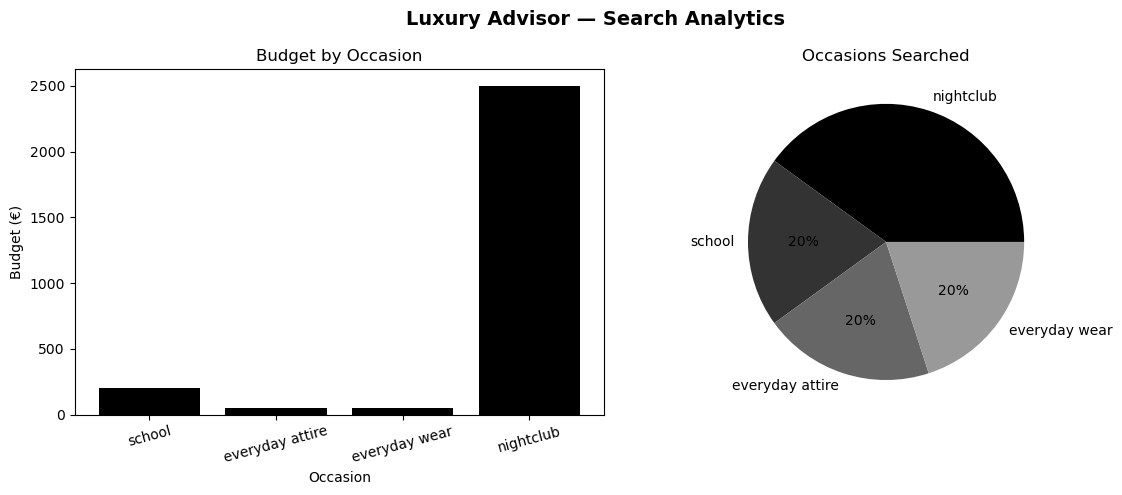

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Budget distribution
ax1.bar(df["Occasion"], df["Budget"], color="black")
ax1.set_title("Budget by Occasion")
ax1.set_xlabel("Occasion")
ax1.set_ylabel("Budget (€)")
ax1.tick_params(axis="x", rotation=15)

# Occasion counts
occasion_counts = df["Occasion"].value_counts()
ax2.pie(occasion_counts, labels=occasion_counts.index, autopct="%1.0f%%", colors=["black", "#333", "#666", "#999", "#ccc"])
ax2.set_title("Occasions Searched")

plt.suptitle("Luxury Advisor — Search Analytics", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("luxury_analytics.png")
plt.show()